# 1. EDA

## Librerías

In [2]:
# Datos
import numpy as np
import pandas as pd

# Visualización
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns

# Funciones
import sys
sys.path.append('..')
from utils.functions import *
from utils.constants import *

# Otros
from warnings import simplefilter

## Carga de datos

In [75]:
train = pd.read_csv(r'..\data\raw\train.csv')

## Procesado básico

In [76]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [77]:
# Procesado 
train_p = train.copy()

# Lowercase
train_p = train_p.rename(columns=str.lower)

# gender
train_p.rename(columns={'gender':'male'}, inplace=True)
train_p['male'] = train_p['male'].map({'Female':0, 'Male':1})

# binary_cols
binary_cols = ['family_history_with_overweight', 'favc', 'smoke', 'scc']
for column in binary_cols:
    train_p[column] = train_p[column].map({'no':0, 'yes':1})

In [78]:
# Guardado
train_p.to_csv(r'..\data\processed\train_1.csv', index=False)

## Primera exploración

In [3]:
train = pd.read_csv(r'..\data\processed\train_1.csv')

# Info
train.drop(columns='id').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   male                            20758 non-null  int64  
 1   age                             20758 non-null  float64
 2   height                          20758 non-null  float64
 3   weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   favc                            20758 non-null  int64  
 6   fcvc                            20758 non-null  float64
 7   ncp                             20758 non-null  float64
 8   caec                            20758 non-null  object 
 9   smoke                           20758 non-null  int64  
 10  ch2o                            20758 non-null  float64
 11  scc                             20758 non-null  int64  
 12  faf                             

In [5]:
# Datos faltantes
train.isna().sum()

id                                0
male                              0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
favc                              0
fcvc                              0
ncp                               0
caec                              0
smoke                             0
ch2o                              0
scc                               0
faf                               0
tue                               0
calc                              0
mtrans                            0
nobeyesdad                        0
dtype: int64

In [6]:
# Duplicados
train[train.drop(columns='id').duplicated(keep=False)]

,id,male,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad


In [7]:
# Estadísticas principales
train.drop(columns='id').describe(include='all', percentiles=percentiles)

,male,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758,20758,20758
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,5,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17529,NaN,NaN,NaN,NaN,NaN,15066,16687,4046
mean,0.497929,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,NaN,0.011803,2.029418,0.033096,0.981747,0.616756,NaN,NaN,NaN
std,0.500008,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,NaN,0.108000,0.608467,0.178891,0.838302,0.602113,NaN,NaN,NaN
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
10%,0.000000,18.000000,1.599867,51.132809,0.000000,1.000000,2.000000,1.079031,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,NaN,0.000000,1.792022,0.000000,0.008013,0.000000,NaN,NaN,NaN
50%,0.000000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,NaN,0.000000,2.000000,0.000000,1.000000,0.573887,NaN,NaN,NaN


## EDA

In [8]:
train.tail()

,id,male,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,1,26.680376,1.816547,118.134898,1,1,3.000000,3.000000,Sometimes,0,2.003563,0,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


### **Target**: nobeyesdad

In [9]:
# Categorizamos columna

from pandas.api.types import CategoricalDtype

obesity_types = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
obesity_cat = CategoricalDtype(categories=obesity_types, ordered=True)

train['nobeyesdad'] = train['nobeyesdad'].astype(obesity_cat)

C:\Users\rodri\AppData\Local\Temp\ipykernel_10996\2263222742.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30);


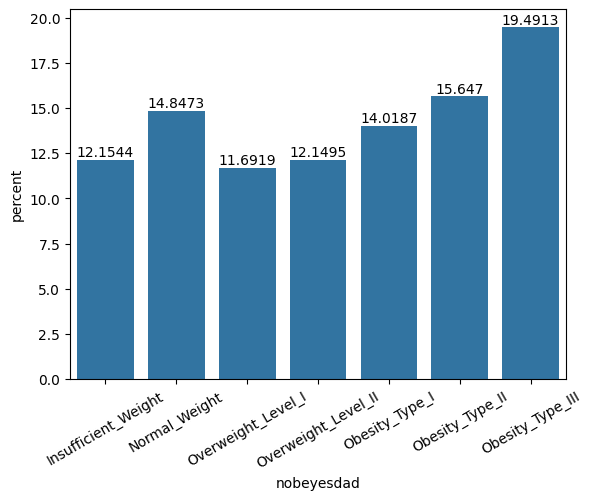

In [10]:
ax = sns.countplot(data=train, x='nobeyesdad', stat='percent', order=obesity_types)
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30);

La proporción de las clases está bastante equilibrada: como posible mejora, se podría hacer un resampling para reducir la cantidad de muestras de la Obesity_Type_III y aumentar las de Insufficient_Weight, Overweight_Level_I y Overweight_Level_II

### Male

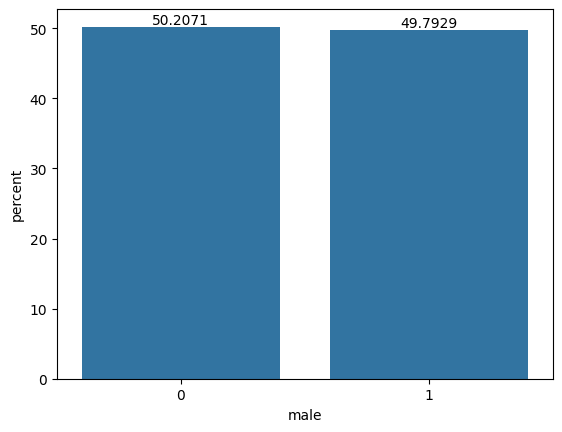

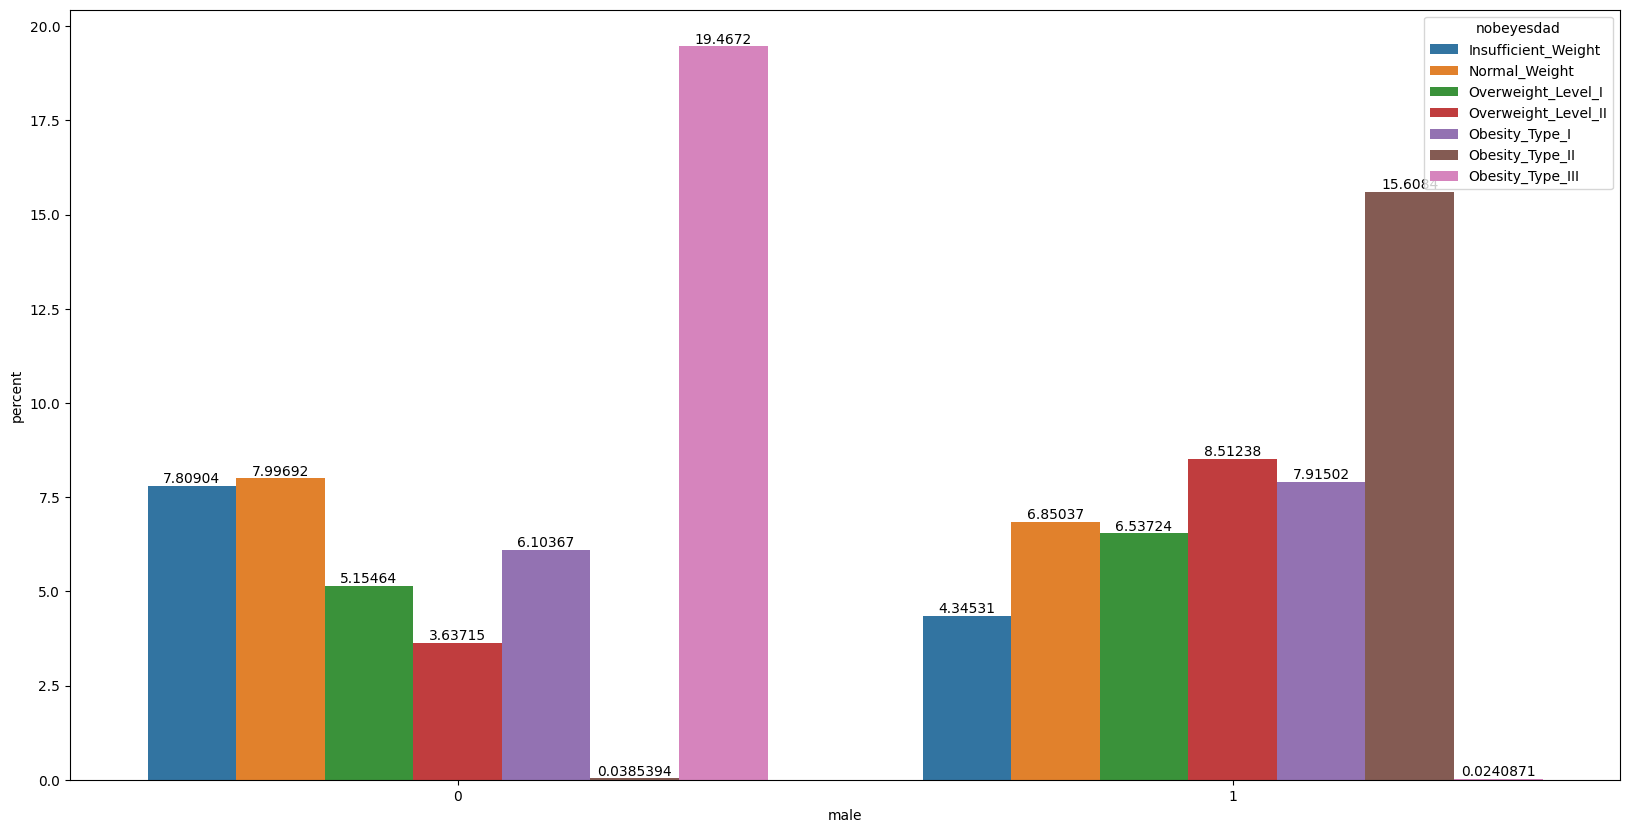

In [11]:
ax = sns.countplot(data=train, x='male', stat='percent')
for container in ax.containers:
    ax.bar_label(container);
plt.figure(figsize=(20,10))
ax = sns.countplot(data=train, x='male', stat='percent', hue='nobeyesdad')
for container in ax.containers:
    ax.bar_label(container);

**Hallazgo**: la proporción de géneros está totalmente balanceada pero las obesidades tipo 2 y 3 están totalmente desbalanceadas con respecto a la target. La obesidad de tipo 2 no tiene muestras de género femenino mientras que tiene muchas de género masculino, y justo al contrario con la de tipo 3: tiene muchas muestras de género femenino pero ninguna en el masculino. Esto significa que, si el modelo acaba dando un peso significativo a la variable de género, sólo predecirá bien la obesidad de tipo 2 si male es 0 y la de tipo 3 si male es 1.

### Age

Min, Max: [14.0, 34.993835]
Outlier percentage: 5.33 %


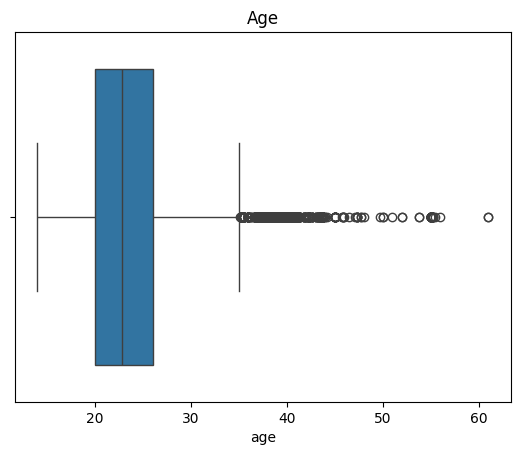

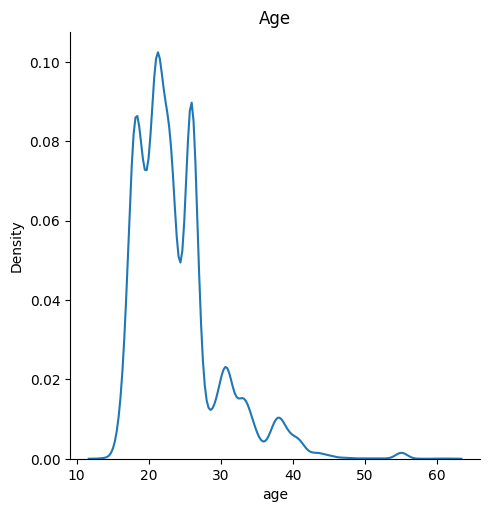

In [67]:
print('Min, Max:', iqr_fence(train.age))
print('Outlier percentage:', round(len(train[(train.age < iqr_fence(train.age)[0]) | (train.age > iqr_fence(train.age)[1])])/len(train), 4)*100, '%')

sns.boxplot(data=train, x='age').set(title='Age');
sns.displot(data=train, x='age', kind='kde').set(title='Age');

In [78]:
# Porcentaje de age "outliers"
print('Porcentaje valores edad > 48:', round(len(train[train.age > 48])/len(train), 3) * 100, '%')

Porcentaje valores edad > 48: 0.3 %


Observamos que la edad no sigue una distribución normal. \
Podríamos eliminar algunos outliers, por ejemplo, todas las edades por encima de los 48, ya que representan sólo el 0,3% de los datos.

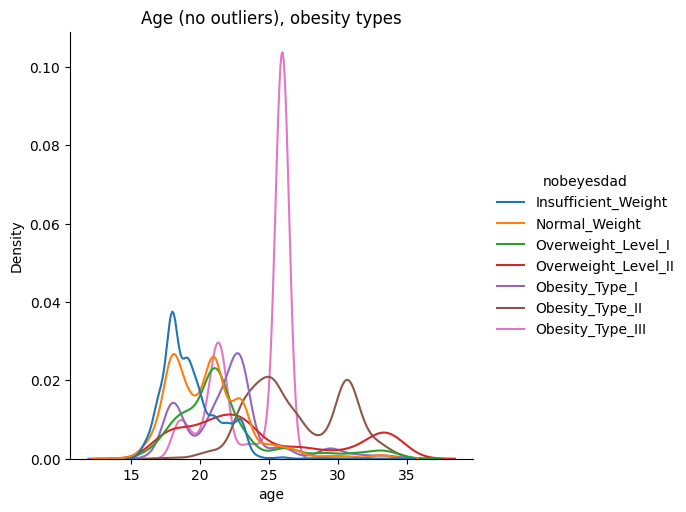

In [14]:
# Distribución edades según target sin outliers
sns.displot(data=train[train['age'] < iqr_fence(train.age)[1]], x='age', kind='kde', hue='nobeyesdad').set(title='Age (no outliers), obesity types');

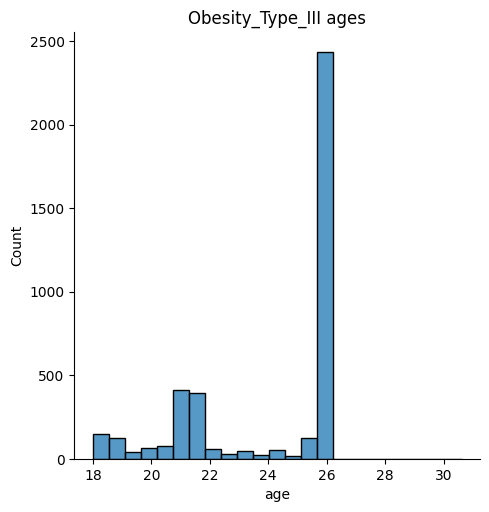

In [15]:
sns.displot(data=train[train['nobeyesdad']=='Obesity_Type_III'], x='age').set(title='Obesity_Type_III ages');

Ninguna de las distribuciones parece ser normal. \
Destaca especialmente Obesity_Type_III, con un elevado número de muestras en la edad 26

### Height

Min, Max: [1.45, 1.947406]
Outlier size: 4


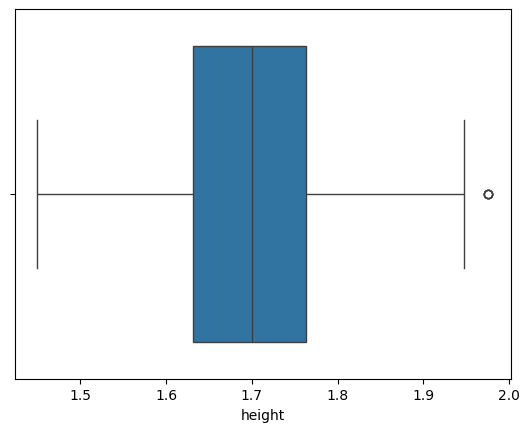

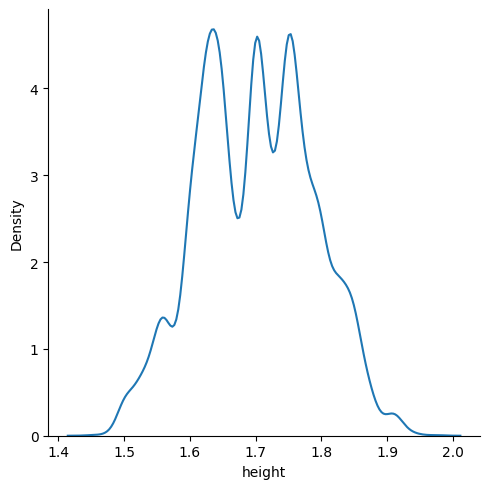

In [16]:
print('Min, Max:', iqr_fence(train.height))
print('Outlier size:', len(train[(train.height < iqr_fence(train.height)[0]) | (train.height > iqr_fence(train.height)[1])]))

sns.boxplot(data=train, x='height');
sns.displot(data=train, x='height', kind='kde');

Distribución de aspecto normal, pero trimodal.

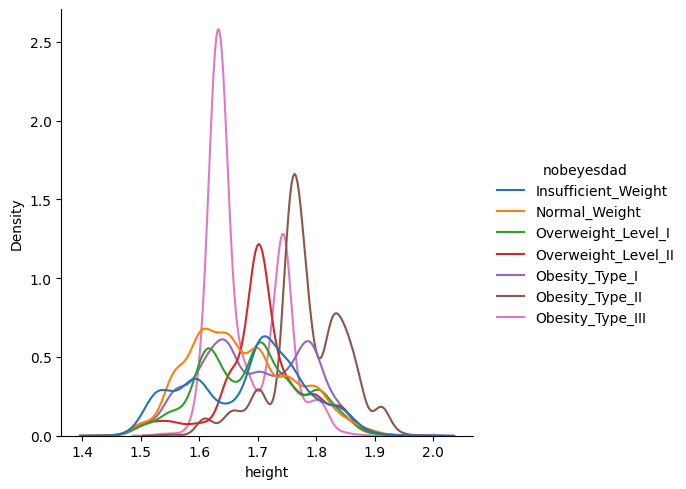

In [17]:
# Distribución alturas según target
sns.displot(data=train, x='height', kind='kde', hue='nobeyesdad');

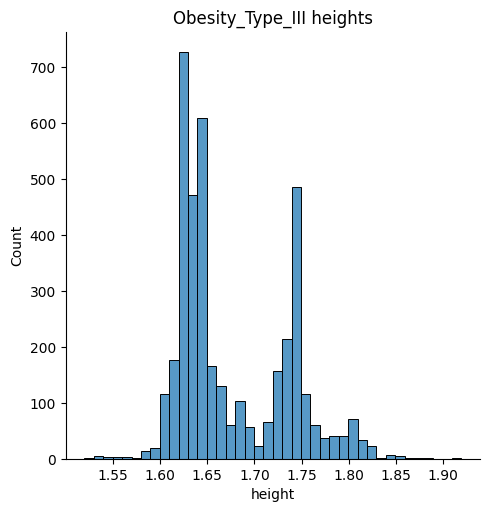

In [4]:
sns.displot(data=train[train['nobeyesdad']=='Obesity_Type_III'], x='height', bins=40).set(title='Obesity_Type_III heights');

Las alturas según la target tampoco están distribuidas de manera normal. \
Vuelve a destacar Obesity_Type_III, con un claro pico en la altura ~1.62-1.64

### Weight

Min, Max: [39.0, 165.057269]
Outlier percentage: 0.0 %


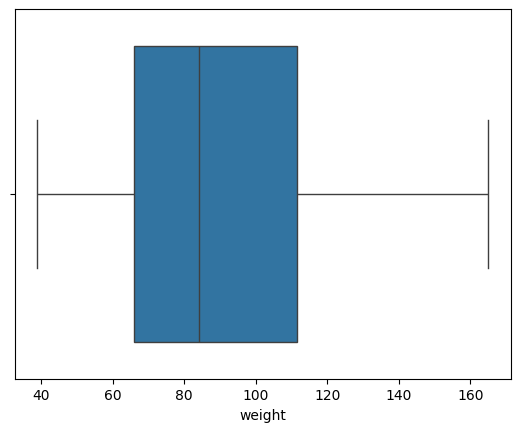

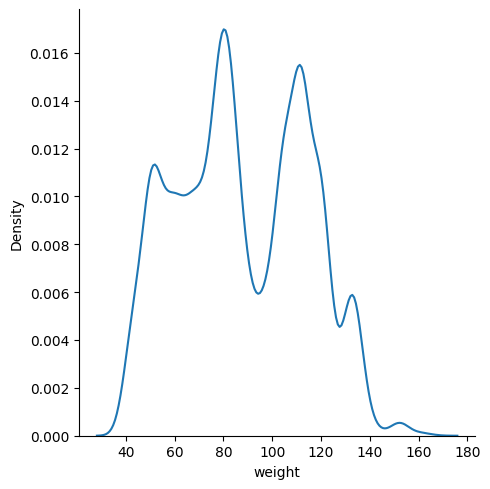

In [19]:
print('Min, Max:', iqr_fence(train.weight))
print('Outlier percentage:', round(len(train[(train.weight < iqr_fence(train.weight)[0]) | (train.weight > iqr_fence(train.weight)[1])])/len(train), 3), '%')

sns.boxplot(data=train, x='weight');
sns.displot(data=train, x='weight', kind='kde');

Los pesos no siguen una distribución normal

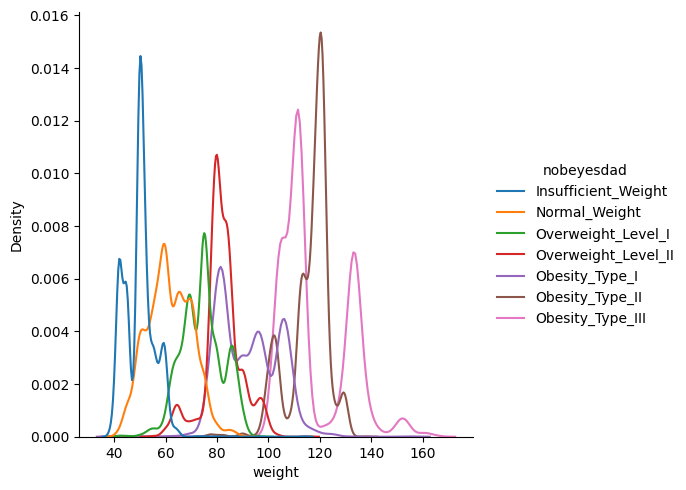

In [20]:
# Distribución pesos según target
sns.displot(data=train, x='weight', kind='kde', hue='nobeyesdad');

Como es lógico, si contrastamos los pesos con la target cada uno se encuentra en un rango distinto, ya que el peso está estrechamente ligado a cada una de las clases. \
Por último, un scatter plot del peso, la altura y la target:

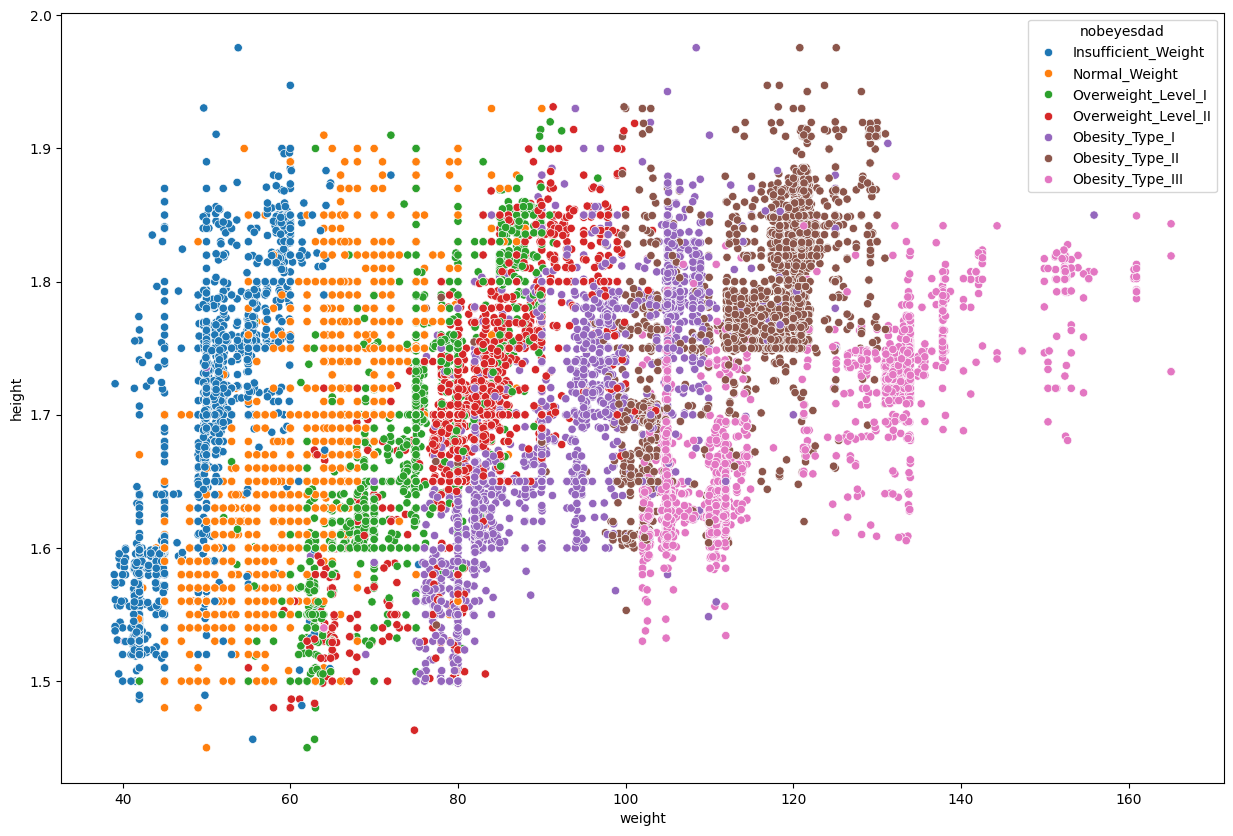

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=train,
                x='weight',
                y='height',
                hue='nobeyesdad');

El aspecto "en diagonal" de las clases nos indica que a medida que aumenta el peso se sube de clase, pero a medida que aumenta la altura se desciende.

### Family history with overweight

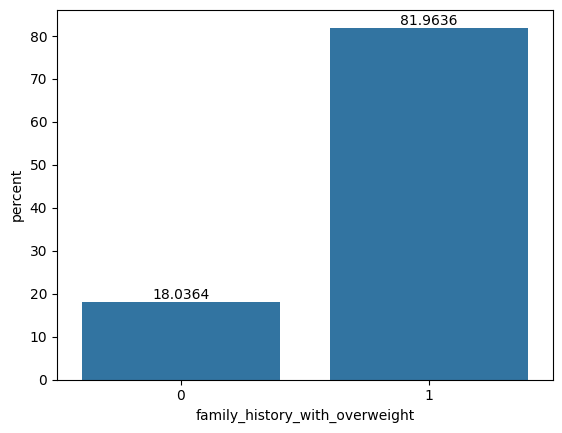

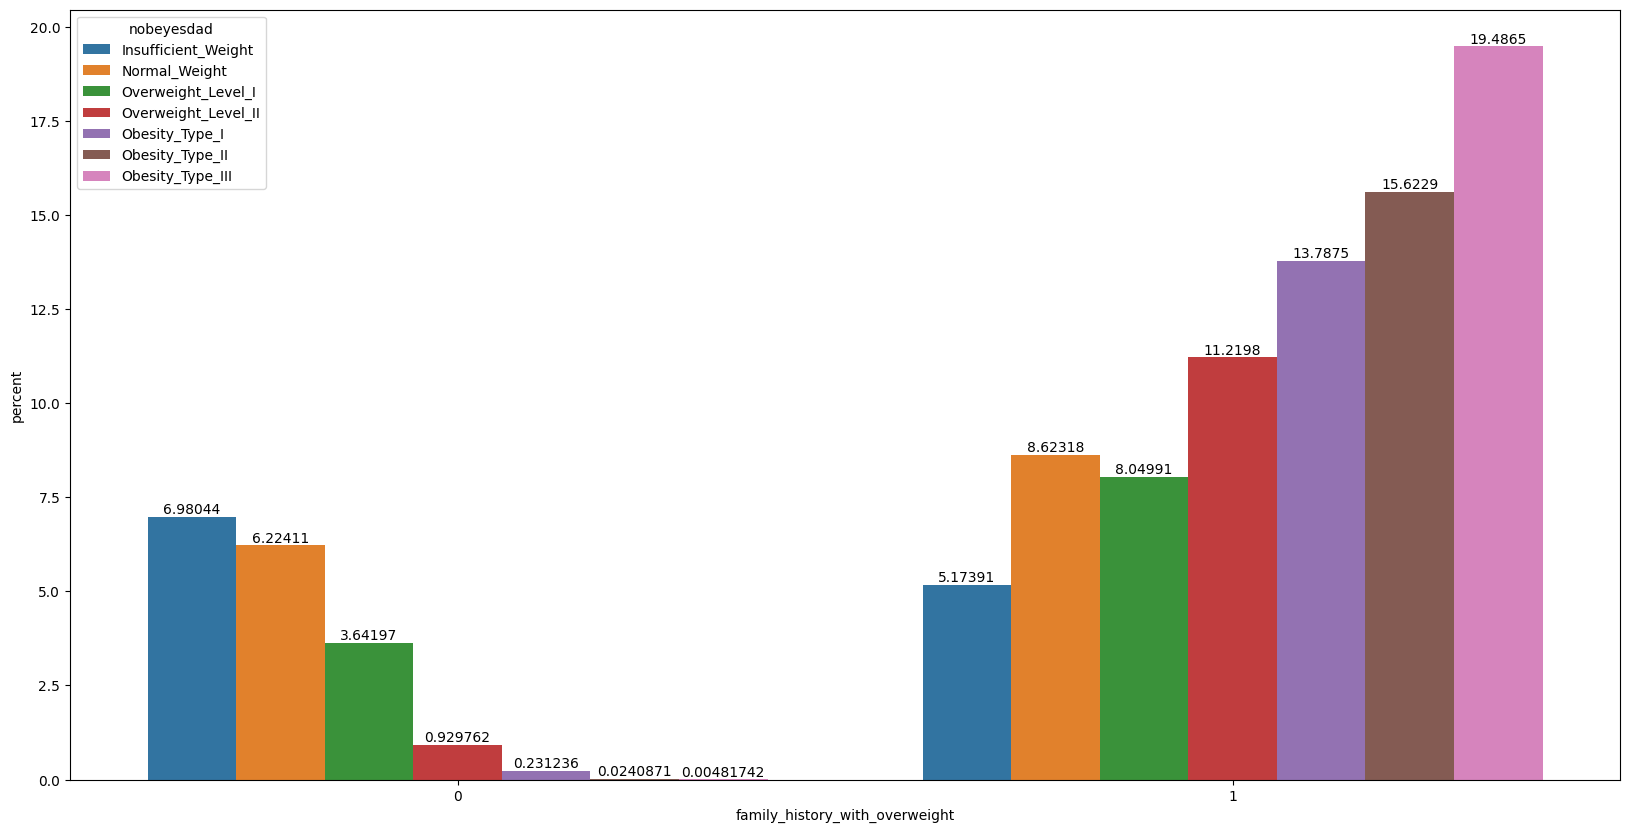

In [22]:
ax = sns.countplot(data=train, x='family_history_with_overweight', stat='percent')
for container in ax.containers:
    ax.bar_label(container);

plt.figure(figsize=(20,10))
ax = sns.countplot(data=train, x='family_history_with_overweight', stat='percent', hue='nobeyesdad')
for container in ax.containers:
    ax.bar_label(container);

**Hallazago**: las muestras de historial de sobrepeso familiar están muy desbalanceadas. Además, observamos que parece haber una correlación alta entre esta variable y la target: cuando la variable es 0, la cantidad de muestras de acuerdo a la target *desciende* de manera más o menos lineal, y cuando la variable es 1, *asciende* de esta misma manera.

### FAVC (consumo frecuente de alimentos altamente calóricos)

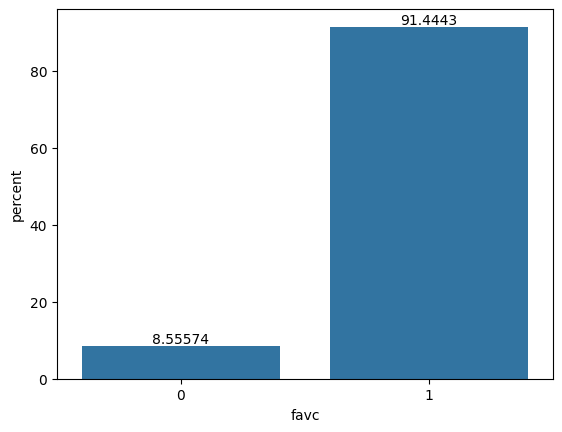

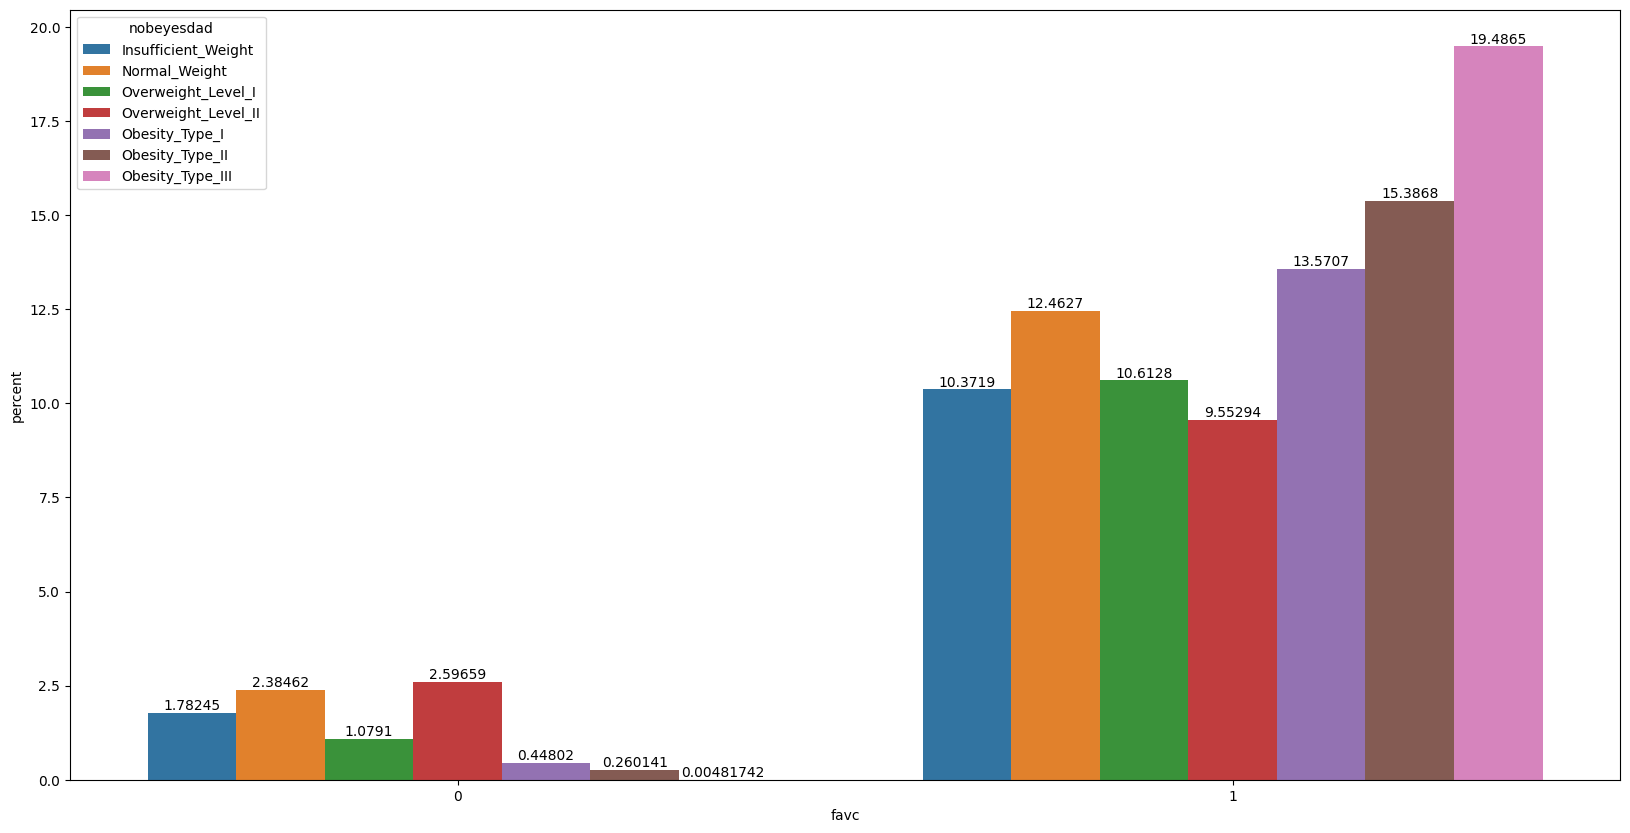

In [23]:
ax = sns.countplot(data=train, x='favc', stat='percent')
for container in ax.containers:
    ax.bar_label(container);

plt.figure(figsize=(20,10))
ax = sns.countplot(data=train, x='favc', stat='percent', hue='nobeyesdad')
for container in ax.containers:
    ax.bar_label(container);

La distribución de la variable favc está muy desbalanceada. \
Por ello, la distribución con respecto a la target coincide con la distribución general de las clases.

### FCVC (consumo frecuente de alimentos vegetales)

Modifico ligeramente los datos redondeando la variable al entero más cercano. Sospecho que este tipo de dato ha sido generado por el modelo de deep learning descrito en el notebook "E1_Tema", ya que dudo que los sujetos entrevistados valoraran esta variable con un precisión de milésimas.

In [24]:
train['fcvc_r'] = round(train.fcvc)

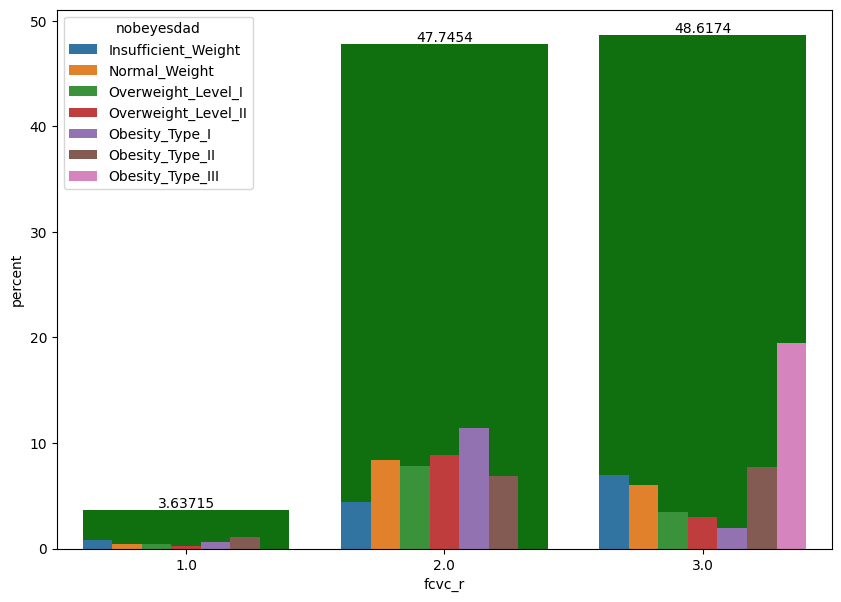

In [25]:
plt.figure(figsize=(10,7))

ax = sns.countplot(data=train, x='fcvc_r', stat='percent', color='g')
for container in ax.containers:
    ax.bar_label(container);

sns.countplot(data=train, x='fcvc_r', stat='percent', hue='nobeyesdad');

Contrariamente a lo que la intuición nos diría, parece haber una estrecha relación entre comer muchos vegetales y la Obesity_Type_III

### NCP (número de comidas principales)

Debido a la naturaleza de esta variable, me atrevo a modificar ligeramente los datos redondeando la variable al entero más cercano. Sospecho que este tipo de dato ha sido generado por el modelo de deep learning descrito en el notebook "E1_Tema", ya que dudo que los sujetos entrevistados valoraran la cantidad de comidas que hacen al día con un precisión de milésimas.

In [27]:
train['ncp_r'] = round(train.ncp)

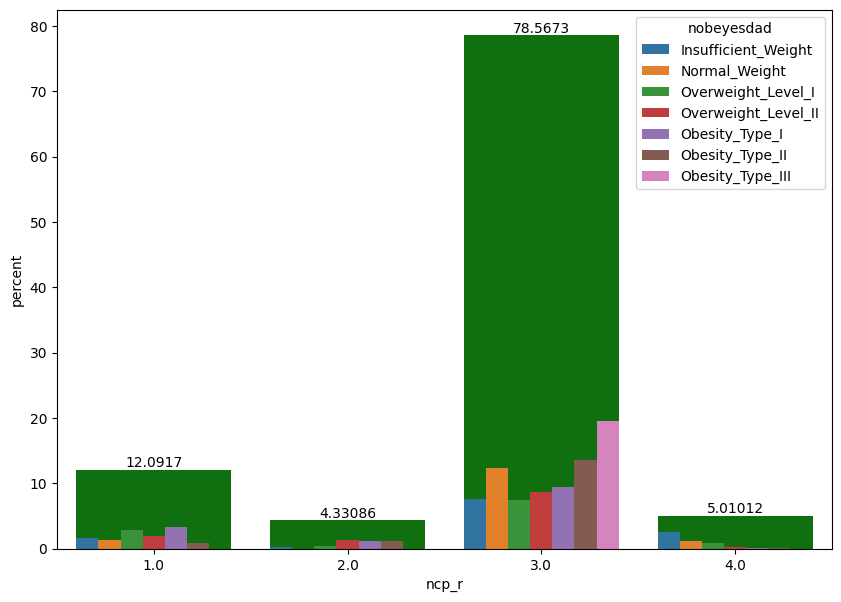

In [28]:
plt.figure(figsize=(10,7))

ax = sns.countplot(data=train, x='ncp_r', stat='percent', color='g')
for container in ax.containers:
    ax.bar_label(container);

sns.countplot(data=train, x='ncp_r', stat='percent', hue='nobeyesdad');

La mayor parte de los entrevistados hace tres comidas al día, y por ello la distribución de las clases cuando la variable es 3 siguen la misma distribución que la general. Debido a este gran desbalanceo, el modelo tendrá más dificultades en determinar la clase del dato cuando la variable sea igual a 1, 2 ó 4. \
\
También sorprende que cuando la variable es igual a 4 la distribución que sigue es la opuesta a la general, pero siendo tan pocos datos podría deberse a un sesgo.

### CAEC (consumo de alimentos a deshora)

In [29]:
# Convertimos la variable en categórica

caec_types = ['no', 'Sometimes', 'Frequently', 'Always']
caec_cat = CategoricalDtype(categories=caec_types, ordered=True)

train['caec'] = train['caec'].astype(caec_cat)

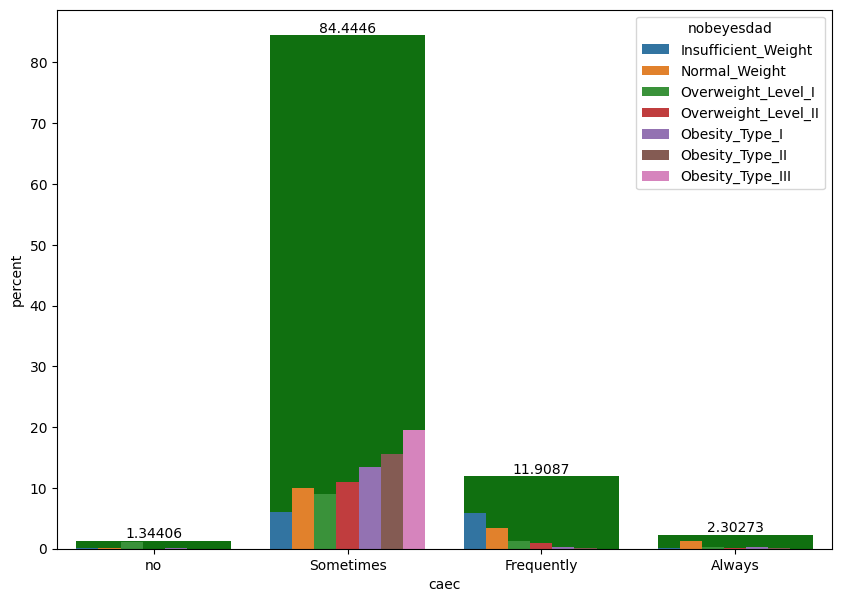

In [30]:
plt.figure(figsize=(10,7))

ax = sns.countplot(data=train, x='caec', stat='percent', color='g')
for container in ax.containers:
    ax.bar_label(container);

sns.countplot(data=train, x='caec', stat='percent', hue='nobeyesdad');

La variable está desbalanceada: 'Sometimes' aglutina más del 80% de los datos. \
Además, observamos que podría no estar relacionada con la target, ya que cuando la variable tiene los valores 'Frequently' o 'Always', ya que cuando la variable tiene los valores 'Frequently' o 'Always', las distribuciones son algo contraintuitivas (generalmente pensaríamos que comer a deshora favorece el sobrepeso). Por otro lado, siendo tan pocos datos (11% y 2%, respectivamente), esta conclusión no es del todo fiable (al ser tan pocas muestras, podríamos estar ante datos sesgados).

### Smoke

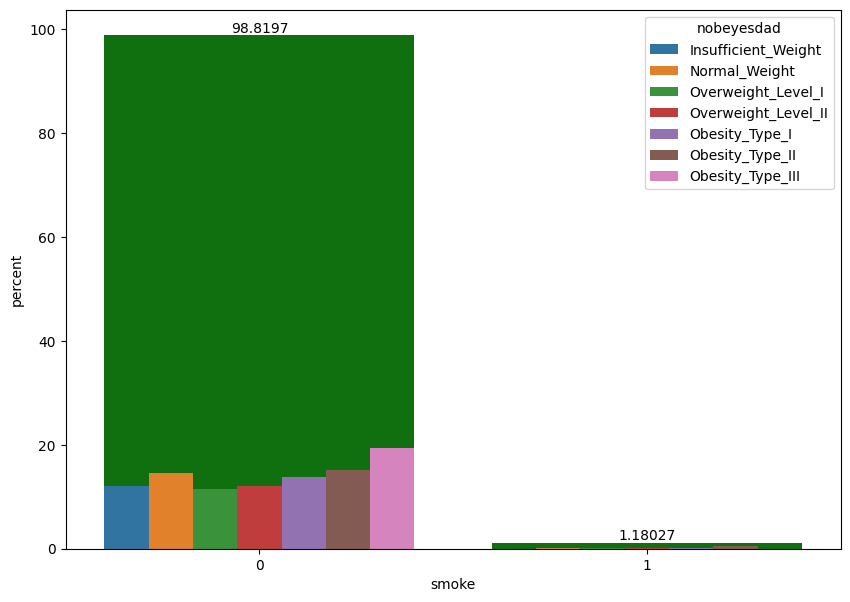

In [31]:
plt.figure(figsize=(10,7))

ax = sns.countplot(data=train, x='smoke', stat='percent', color='g')
for container in ax.containers:
    ax.bar_label(container);

sns.countplot(data=train, x='smoke', stat='percent', hue='nobeyesdad');

La variable está absolutamente desbalanceada: a penas hay fumadores en el dataset. Probablemente podamos desechar esta variable para el modelo.

### CH2O (consumo diario de agua)

Redondeo los valores de la variable de acuerdo al mismo principio que la variable ncp: dudo mucho que los entrevistados hayan introducido valores con precisión más allá de las milésimas, deben de ser datos generados por el modelo de DL.

In [32]:
train['ch2o_r'] = round(train.ch2o)

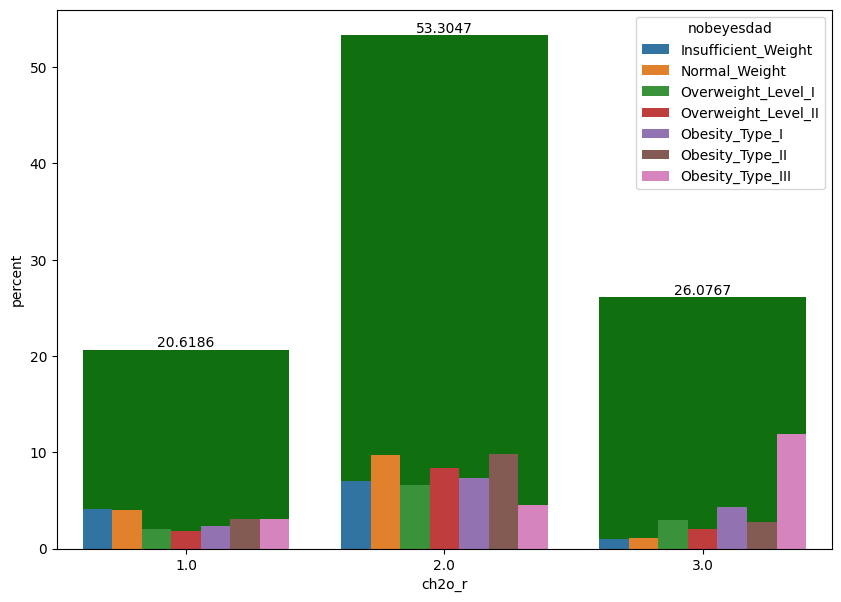

In [33]:
plt.figure(figsize=(10,7))

ax = sns.countplot(data=train, x='ch2o_r', stat='percent', color='g')
for container in ax.containers:
    ax.bar_label(container);

sns.countplot(data=train, x='ch2o_r', stat='percent', hue='nobeyesdad');

Esta variable está algo más balanceada, aunque sigue habiendo desequilibrio. A priori, podemos observar que la distribución de las clases es homogénea para los entrevistados que consume 1 y 2 litros de agua al día. Sin embargo, en la distribución de los que beben 3 litros la clase Obesity_Type_III se dispara.

### SCC (monitorización de consumo de calorías)

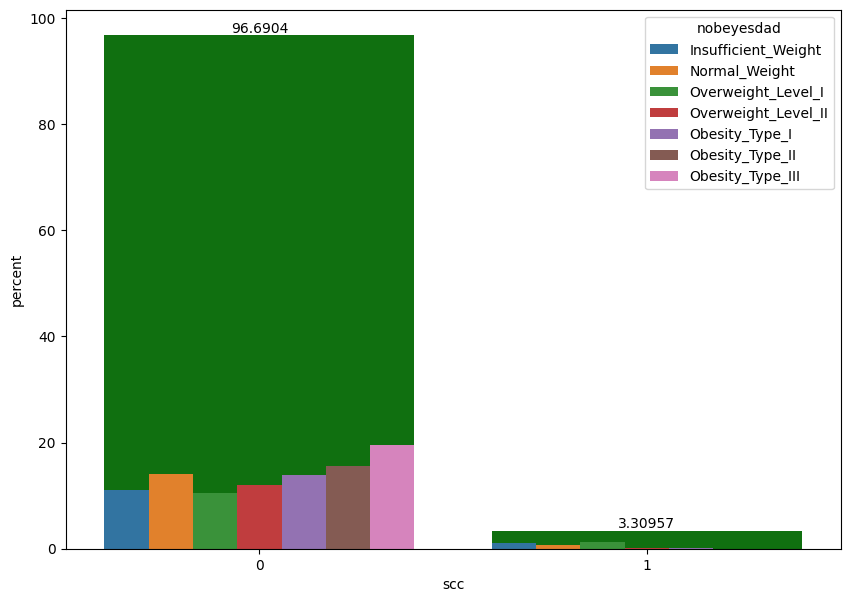

In [41]:
plt.figure(figsize=(10,7))

ax = sns.countplot(data=train, x='scc', stat='percent', color='g')
for container in ax.containers:
    ax.bar_label(container);

sns.countplot(data=train, x='scc', stat='percent', hue='nobeyesdad');

Variable totalmente desbalanceada: podría no ser útil para el modelo.

### FAF (frecuencia de activad física)

Redondeo de nuevo

In [35]:
train['faf_r'] = round(train.faf)

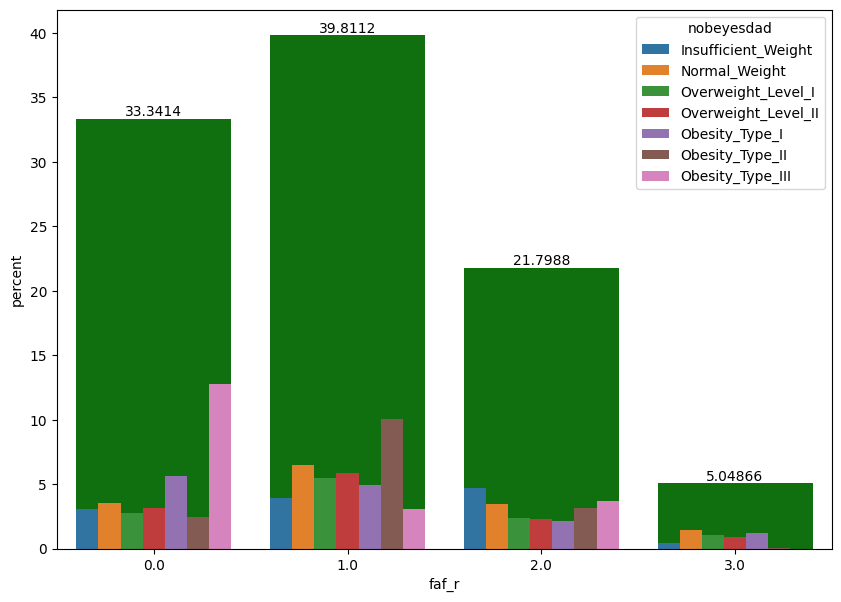

In [36]:
plt.figure(figsize=(10,7))

ax = sns.countplot(data=train, x='faf_r', stat='percent', color='g')
for container in ax.containers:
    ax.bar_label(container);

sns.countplot(data=train, x='faf_r', stat='percent', hue='nobeyesdad');

La variable está algo balanceada. También observamos que cuando la variable es igual a 0 ó 1, las obesidades de tipo II y III se disparan ligeramente. Tal vez se podría clusterizar a mano esta variable.

### TUE (tiempo de uso de dispositivos)

Aplico redondeo

In [37]:
train['tue_r'] = round(train.tue)

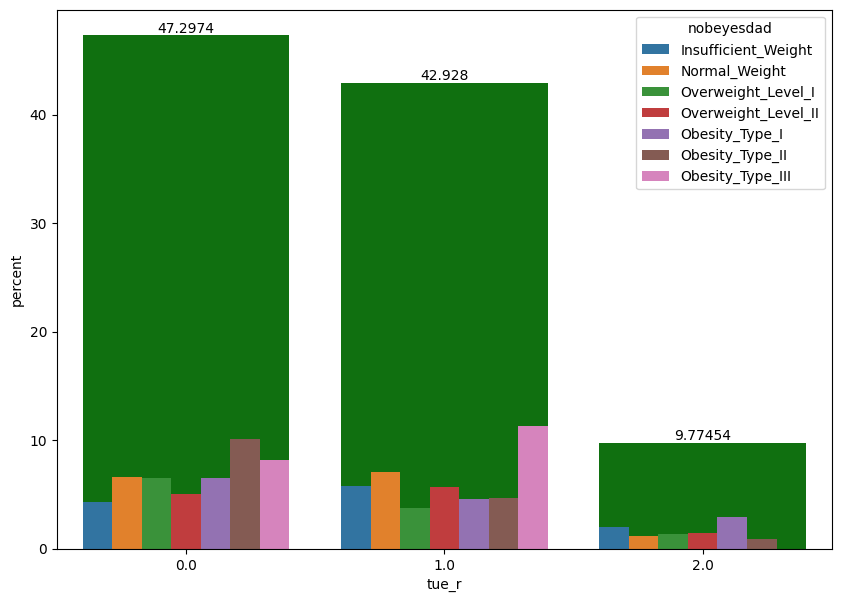

In [38]:
plt.figure(figsize=(10,7))

ax = sns.countplot(data=train, x='tue_r', stat='percent', color='g')
for container in ax.containers:
    ax.bar_label(container);

sns.countplot(data=train, x='tue_r', stat='percent', hue='nobeyesdad');

Esta variable también está desbalanceada. Tanto cuando la variable es igual a 0 como cuando es igual a 2, la distribución de las clases parece ser algo homogénea. Cuando la variable es igual a 1, Obesity_Type_III se dispara ligeramente.

### MTRANS (medios de transporte utilizados)

Resumo la variable a transporte privado, transporte público, transporte físico.

In [39]:
mtrans_types = ['physic', 'public', 'private']
mtrans_cat = CategoricalDtype(categories=mtrans_types, ordered=True)

train['mtrans_s'] = train.mtrans.map({'Public_Transportation': 'public',
                                      'Automobile': 'private',
                                      'Walking': 'physic',
                                      'Motorbike':'private',
                                      'Bike':'physic'}).astype(mtrans_cat)

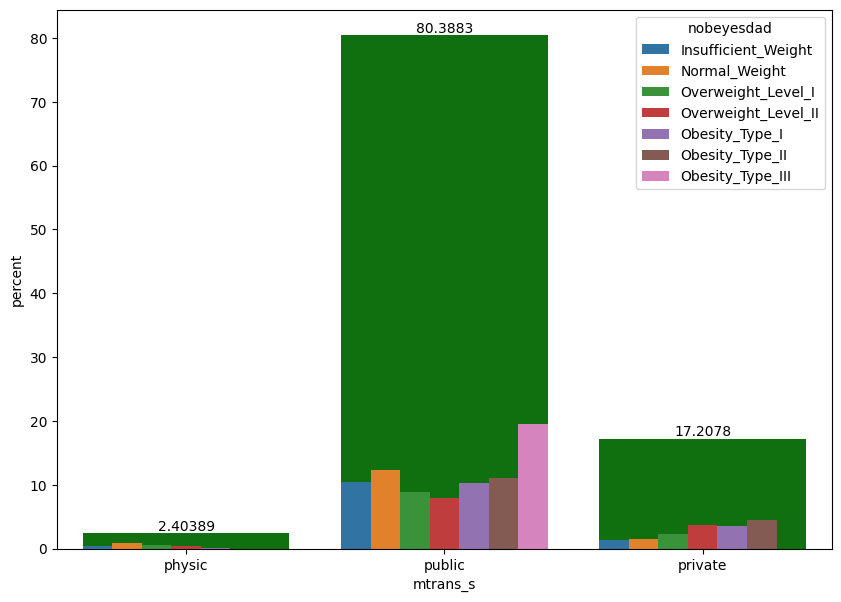

In [40]:
plt.figure(figsize=(10,7))

ax = sns.countplot(data=train, x='mtrans_s', stat='percent', color='g')
for container in ax.containers:
    ax.bar_label(container);

sns.countplot(data=train, x='mtrans_s', stat='percent', hue='nobeyesdad');

De nuevo, la variable está desbalanceada, y por lo tanto es poco fiable sacar conclusiones de ella.

## Conclusiones

Después de la exploración univariante y bivariante del dataset, se concluye que la variable:
- **Target** (tipo de obesidad): está balanceada pero con una ligera representación de la Obesity_Type_III. Se podría recortar en el siguiente paso.
- **Male**: está totalmente balanceada, pero muy desequilibrada con respecto a la target. No existen entrevistados mujer con Obesity_Type_II y hay muchos con la tipo III, y no existen entrevistados hombre con Obesity_Type_III pero muchos con la tipo II. Podría dificultar al modelo.
- **Age**: presenta una distribución semi-normal, ya que es trimodal. Se pueden eliminar algunos outliers, en este caso las edades por encima de los 48. No dañará mucho el dataset porque representan sólo el 0.3% de los datos. Por otro lado, cuando la target es Obesity_Type_III la edad de 26 se dispara. Sería útil tener esto en cuenta a la hora de hacer el undersampling de este valor (eliminar muestras de este tipo *y* que tengan la edad de 26)
- **Height**: tiene una distribución de aspecto normal, pero trimodal. Al separar la variable de acuerdo a la target, vemos que las obesidades tipo II y III tienen picos muy acusados. Sólo hay cuatro outliers que podemos eliminar.
- **Weight**: no tiene una distribución de aspecto normal. Si segmentamos de acuerdo a la target, vemos que las clases está más o menos bien separadas entre sí, lo cual hace que sea muy probable que esté muy correlacioanda con la target. Hay algún caso, como con las obesidades tipo II y III, en los que la separación parece ser algo contraintuitiva (probablemente tenga que ver con la altura).
- **Family history with overweight**: está muy desbalanceada y parece tener una alta correlación con la target. Cuando la variable es igual a 0, a penas hay casos de obesidad, y cuando es igual a 1, hay muchos.
- **FAVC** (consumo frecuente de alimentos calóricos): está muy desbalanceada. Por ello, la distribución con respecto a la target coincide con su propia distribución general.
- **FCVC** (consumo frecuente de alimentos vegetales): está balanceada para los valores 2 y 3, pero a penas hay 1s. La clase Obesity_Type_III sólo se da con el valor 3.
- **NCP** (número de comidas principales): está muy desbalanceada. La mayor parte de los entrevistados hace tres comidas al día, y por ello la distribución de las clases cuando la variable es 3 sigue la misma distribución que la general.
- **CAEC** (consumo de alimentos a deshoras): está desbalanceada: 'Sometimes' aglutina más del 80% de los datos. Además, observamos que podría no estar relacionada con la target, ya que cuando la variable tiene los valores 'Frequently' o 'Always', las distribuciones son algo contraintuitivas (generalmente pensaríamos que comer a deshora favorece el sobrepeso). Por otro lado, siendo tan pocos datos (11% y 2%, respectivamente), esta conclusión no es del todo fiable (al ser tan pocas muestras, podríamos estar ante datos sesgados).
- **Smoke**: está totalmente desbalanceada. Sólo hay un 1% de fumadores en el dataset.
- **CH2O** (consumo diario de agua): está algo más balanceada, aunque sigue habiendo desequilibrio. Para el valor 3 (26% de los datos), la clase Obesity_Type_III se dispara.
- **SCC** (monitorización de consumo de calorías): está totalmente desbalanceada.
- **FAF** (frecuencia de actividad física): está algo balanceada. Cuando la variable es igual a 0 ó 1, las obesidades de tipo II y III se disparan. Tal vez se podría clusterizar a mano esta variable.
- **TUE** (tiempo de uso de dispositivos): está balanceada para los valores 0 y 1, pero no para 2. Cuando la variable es igual a 0 y 2, la distribución de las clases parece ser algo homogénea. Cuando la variable es igual a 1, Obesity_Type_III se dispara ligeramente.
- **MTRANS** (medio de transporte utilizado): la variable está tan desbalanceada que parece poco fiable sacar conclusiones de ella.

## Tratamientos, nuevo csv

In [79]:
# Sustitución de las viejas columnas por las nuevas
train_p2 = train.copy()

train_p2.fcvc = train.fcvc_r.copy()
train_p2.ncp = train.ncp_r.copy()
train_p2.ch2o = train.ch2o_r.copy()
train_p2.faf = train.faf_r.copy()
train_p2.tue = train.tue_r.copy()
train_p2.mtrans = train.mtrans_s.copy()

train_p2 = train_p2.loc[:, 'id':'nobeyesdad']
train_p2

,id,male,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.0,3.0,Sometimes,0,3.0,0,0.0,1.0,Sometimes,public,Overweight_Level_II
1,1,0,18.000000,1.560000,57.000000,1,1,2.0,3.0,Frequently,0,2.0,0,1.0,1.0,no,private,Normal_Weight
2,2,0,18.000000,1.711460,50.165754,1,1,2.0,1.0,Sometimes,0,2.0,0,1.0,2.0,no,public,Insufficient_Weight
3,3,0,20.952737,1.710730,131.274851,1,1,3.0,3.0,Sometimes,0,2.0,0,1.0,1.0,Sometimes,public,Obesity_Type_III
4,4,1,31.641081,1.914186,93.798055,1,1,3.0,2.0,Sometimes,0,2.0,0,2.0,1.0,Sometimes,public,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,3.0,3.0,Sometimes,0,2.0,0,1.0,0.0,Sometimes,public,Obesity_Type_II
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.0,4.0,Frequently,0,1.0,0,2.0,1.0,Sometimes,public,Insufficient_Weight
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.0,3.0,Sometimes,0,2.0,0,1.0,1.0,no,public,Obesity_Type_II
20756,20756,1,33.852953,1.700000,83.520113,1,1,3.0,2.0,Sometimes,0,2.0,0,0.0,1.0,no,private,Overweight_Level_II


In [81]:
# Eliminamos outliers de age y height
age_outliers = train_p2[train_p2.age > 48]
height_outliers = train_p2[train_p2.height > iqr_fence(train_p2.height)[1]]

train_p2.drop(index=age_outliers.index, inplace=True)
train_p2.drop(index=height_outliers.index, inplace=True)

In [82]:
# Guardamos
train_p2.to_csv(r'..\data\processed\train_2.csv', index=False)

<hr>

<div style="display: flex; justify-content: space-between; margin-bottom: 10px;">
    <div style="text-align: right;">
        <a href="./2_Feature_Engineering.ipynb">
            <button>2. Feature Engineering &#8594;</button>
        </a>
    </div>
</div>

<hr>